# pandas

Pandas는 파이썬에서 사용하는 데이터분석 라이브러리로, 행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구

출처: https://doorbw.tistory.com/172 [Tigercow.Door]

라이브러리 (필요한 코드를 재사용하기 위해 언제든지 필요한 곳에서 호출할 수 있도록 개발자들에 의해서 이미 만들어진 클래스나 함수를 모아놓은 것)


* **10 minutes to pandas**
출처: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html


# import 
하여 기능 꺼냄

In [160]:
import numpy as np #행렬 등의 다차원의 배열을 쉽게 다룰 수 있게 해주는 대표적인 라이브러리


In [161]:
import pandas as pd
import matplotlib.pyplot as plt #plot 그릴 때


# 1. object creation (객체 생성) 

(객체: 어떠한 속성값과 행동을 가지고 있는 데이터)

#pandas의 자료구조
시리즈(series)와 데이터프레임(dataframe)
;시리즈: 1차원 배열
데이터프레임: 2차원 배열

In [162]:
s = pd.Series([1, 3, 5, np.nan, 6, 8]) #시리즈
#np.nan = 결측값

In [163]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [164]:
dates = pd.date_range('20130101', periods=6) #데이터프레임의 index
#날짜-시간 데이터

In [165]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [166]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD')) 
#np.random.randn (m,n) = 난수를 matrix array (m,n)에서 생성
#Q1: 난수


In [167]:
df

,A,B,C,D
2013-01-01,0.466059,-1.058833,1.158811,-0.080239
2013-01-02,2.569597,-0.649895,0.123704,-1.126886
2013-01-03,0.905975,-0.683313,0.011778,0.090980
2013-01-04,-0.652321,0.450505,2.034118,0.950318
2013-01-05,-1.476378,-0.777582,-0.025638,0.731964
2013-01-06,-0.327052,-0.380767,0.753715,-2.598459


In [168]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),  #Q: pd.Timestamp??
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})
#디폴트값

In [169]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [170]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#float: 실수형 자료형
int: 정수형

#탭 자동완성 기능 실행됨

# 2. Viewing Data (데이터 확인하기)


In [171]:
df.head() #디폴트: 5개

,A,B,C,D
2013-01-01,0.466059,-1.058833,1.158811,-0.080239
2013-01-02,2.569597,-0.649895,0.123704,-1.126886
2013-01-03,0.905975,-0.683313,0.011778,0.090980
2013-01-04,-0.652321,0.450505,2.034118,0.950318
2013-01-05,-1.476378,-0.777582,-0.025638,0.731964


In [172]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.652321,0.450505,2.034118,0.950318
2013-01-05,-1.476378,-0.777582,-0.025638,0.731964
2013-01-06,-0.327052,-0.380767,0.753715,-2.598459


In [173]:
df.index #인덱스 확인(행 이름)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [174]:
df.columns #열 확인

Index(['A', 'B', 'C', 'D'], dtype='object')

In [175]:
df.values #값

array([[ 0.46605908, -1.05883315,  1.15881069, -0.08023931],
       [ 2.5695968 , -0.6498948 ,  0.12370362, -1.12688591],
       [ 0.90597459, -0.68331256,  0.01177837,  0.09097955],
       [-0.65232122,  0.45050522,  2.0341182 ,  0.95031772],
       [-1.47637773, -0.77758157, -0.02563848,  0.73196371],
       [-0.32705229, -0.38076658,  0.75371485, -2.59845868]])

.to_numpy: pandas 객체를 numpy 배열 객체인 ndarray로 반환

In [176]:
df.to_numpy()

array([[ 0.46605908, -1.05883315,  1.15881069, -0.08023931],
       [ 2.5695968 , -0.6498948 ,  0.12370362, -1.12688591],
       [ 0.90597459, -0.68331256,  0.01177837,  0.09097955],
       [-0.65232122,  0.45050522,  2.0341182 ,  0.95031772],
       [-1.47637773, -0.77758157, -0.02563848,  0.73196371],
       [-0.32705229, -0.38076658,  0.75371485, -2.59845868]])

In [177]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [178]:
df.describe() #대략적인 통계적 정보 요약

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.247647,-0.516647,0.676081,-0.338720
std,1.413155,0.521811,0.815126,1.325674
min,-1.476378,-1.058833,-0.025638,-2.598459
25%,-0.571004,-0.754014,0.039760,-0.865224
50%,0.069503,-0.666604,0.438709,0.005370
75%,0.795996,-0.448049,1.057537,0.571718
max,2.569597,0.450505,2.034118,0.950318


In [179]:
df.T #전치

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.466059,2.569597,0.905975,-0.652321,-1.476378,-0.327052
B,-1.058833,-0.649895,-0.683313,0.450505,-0.777582,-0.380767
C,1.158811,0.123704,0.011778,2.034118,-0.025638,0.753715
D,-0.080239,-1.126886,0.090980,0.950318,0.731964,-2.598459


In [180]:
df.sort_index(axis=1, ascending=False)
#axis=0은 인덱스 기준, axis=1은 컬럼 기준
#ascending=True는 오름차순, 반대는 내림차순

,D,C,B,A
2013-01-01,-0.080239,1.158811,-1.058833,0.466059
2013-01-02,-1.126886,0.123704,-0.649895,2.569597
2013-01-03,0.090980,0.011778,-0.683313,0.905975
2013-01-04,0.950318,2.034118,0.450505,-0.652321
2013-01-05,0.731964,-0.025638,-0.777582,-1.476378
2013-01-06,-2.598459,0.753715,-0.380767,-0.327052


In [181]:
df.sort_values(by='B') #B에 대해 정렬, 자동 오름차순

,A,B,C,D
2013-01-01,0.466059,-1.058833,1.158811,-0.080239
2013-01-05,-1.476378,-0.777582,-0.025638,0.731964
2013-01-03,0.905975,-0.683313,0.011778,0.090980
2013-01-02,2.569597,-0.649895,0.123704,-1.126886
2013-01-06,-0.327052,-0.380767,0.753715,-2.598459
2013-01-04,-0.652321,0.450505,2.034118,0.950318


# 3. Selection (선택)
 Pandas에 최적화된 데이터 접근 방법인 .at, .iat, .loc 및 .iloc 을 추천

### Getting (데이터 얻기)
단일 열 선택


In [182]:
df['A']

2013-01-01    0.466059
2013-01-02    2.569597
2013-01-03    0.905975
2013-01-04   -0.652321
2013-01-05   -1.476378
2013-01-06   -0.327052
Freq: D, Name: A, dtype: float64

In [183]:
df[0:3] #맨 처음부터 3개

,A,B,C,D
2013-01-01,0.466059,-1.058833,1.158811,-0.080239
2013-01-02,2.569597,-0.649895,0.123704,-1.126886
2013-01-03,0.905975,-0.683313,0.011778,0.090980


In [184]:
df['20130102':'20130104'] #인덱스명에 해당하는 값

,A,B,C,D
2013-01-02,2.569597,-0.649895,0.123704,-1.126886
2013-01-03,0.905975,-0.683313,0.011778,0.090980
2013-01-04,-0.652321,0.450505,2.034118,0.950318


### Selection by Label (Label을 통한 선택)


In [185]:
df.loc[dates[0]] #.loc: 인덱스를 기준으로 행 데이터 추출



A    0.466059
B   -1.058833
C    1.158811
D   -0.080239
Name: 2013-01-01 00:00:00, dtype: float64

In [186]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.466059,-1.058833
2013-01-02,2.569597,-0.649895
2013-01-03,0.905975,-0.683313
2013-01-04,-0.652321,0.450505
2013-01-05,-1.476378,-0.777582
2013-01-06,-0.327052,-0.380767


In [29]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.734098,0.661460
2013-01-03,2.267366,-0.098548
2013-01-04,-0.185639,1.754904


In [30]:
df.loc['20130102', ['A', 'B']]

A    0.734098
B    0.661460
Name: 2013-01-02 00:00:00, dtype: float64

In [31]:
df.loc[dates[0], 'A'] #스칼라 값에는 정수형, 실수형 등

0.41324782933919546

In [32]:
df.at[dates[0],'A']

0.41324782933919546

### Selection by Position (위치로 선택하기)
넘겨받은 정수의 위치를 기준으로 선택

In [33]:
df.iloc[3] #.iloc: 행 번호를 기준으로 행 데이터 추출

A   -0.185639
B    1.754904
C   -1.248976
D   -0.010901
Name: 2013-01-04 00:00:00, dtype: float64

In [34]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.185639,1.754904
2013-01-05,0.081167,-1.499404


#### **df[컬럼명], df[시작인덱스:끝인덱스+1], df[시작인덱스명:끝인덱스명]

In [35]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.734098,-0.513791
2013-01-03,2.267366,0.034384
2013-01-05,0.081167,-1.462949


In [36]:
df.iloc[1:3, :] #열 전체

,A,B,C,D
2013-01-02,0.734098,0.661460,-0.513791,-0.221215
2013-01-03,2.267366,-0.098548,0.034384,-1.497532


In [37]:
df.iloc[:, 1:3] #행 전체

,B,C
2013-01-01,-1.169733,-2.271486
2013-01-02,0.661460,-0.513791
2013-01-03,-0.098548,0.034384
2013-01-04,1.754904,-1.248976
2013-01-05,-1.499404,-1.462949
2013-01-06,-0.386191,-0.012302


In [38]:
df.iloc[1, 1]

0.6614599470208099

In [39]:
df.iat[1, 1]

0.6614599470208099

### Boolean Indexing (조건을 이용하여 선택)

In [189]:
df[df['A'] > 0]["A"]  #Q:조건을 충족하는 A열만 추출하고 싶다면?? isin 사용하면 되나

2013-01-01    0.466059
2013-01-02    2.569597
2013-01-03    0.905975
Freq: D, Name: A, dtype: float64

In [41]:
df[df > 0]

,A,B,C,D
2013-01-01,0.413248,NaN,NaN,NaN
2013-01-02,0.734098,0.661460,NaN,NaN
2013-01-03,2.267366,NaN,0.034384,NaN
2013-01-04,NaN,1.754904,NaN,NaN
2013-01-05,0.081167,NaN,NaN,NaN
2013-01-06,0.479872,NaN,NaN,0.618843


In [42]:
df2 = df.copy()

In [43]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [44]:
df2

,A,B,C,D,E
2013-01-01,0.413248,-1.169733,-2.271486,-0.615544,one
2013-01-02,0.734098,0.661460,-0.513791,-0.221215,one
2013-01-03,2.267366,-0.098548,0.034384,-1.497532,two
2013-01-04,-0.185639,1.754904,-1.248976,-0.010901,three
2013-01-05,0.081167,-1.499404,-1.462949,-0.727953,four
2013-01-06,0.479872,-0.386191,-0.012302,0.618843,three


In [45]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,2.267366,-0.098548,0.034384,-1.497532,two
2013-01-05,0.081167,-1.499404,-1.462949,-0.727953,four


### Setting (데이터 변경)


In [46]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

In [144]:
s2 = pd.Series([1, 2, 3, 4, 5, 6])
s2

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [146]:
df['G'] = s2
df

,A,B,C,D,G
2000-01-01,-0.598097,0.981315,-0.033621,-0.333715,NaN
2000-01-02,-1.174601,0.506625,-0.341083,1.902929,NaN
2000-01-03,-0.403693,-0.466773,-0.508402,0.153915,NaN
2000-01-04,2.409120,-1.095435,1.839671,-0.267354,NaN
2000-01-05,1.935238,-0.362707,1.993212,-0.452986,NaN
...,...,...,...,...,...
2002-09-22,-22.319584,-24.644400,-23.892103,-9.924317,NaN
2002-09-23,-24.046820,-22.614133,-26.248396,-9.788669,NaN
2002-09-24,-22.761562,-20.867899,-25.878388,-9.941377,NaN
2002-09-25,-23.260954,-21.069311,-24.394613,-10.488987,NaN


In [47]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [48]:
df['F'] = s1 #인덱스 정해주지 않고 추가하면 오류 뜰까? 해보니 오류난다

In [49]:
df

,A,B,C,D,F
2013-01-01,0.413248,-1.169733,-2.271486,-0.615544,NaN
2013-01-02,0.734098,0.661460,-0.513791,-0.221215,1.0
2013-01-03,2.267366,-0.098548,0.034384,-1.497532,2.0
2013-01-04,-0.185639,1.754904,-1.248976,-0.010901,3.0
2013-01-05,0.081167,-1.499404,-1.462949,-0.727953,4.0
2013-01-06,0.479872,-0.386191,-0.012302,0.618843,5.0


In [50]:
df.at[dates[0], 'A'] = 0 #라벨을 이용한 변경

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,-1.169733,-2.271486,-0.615544,NaN
2013-01-02,0.734098,0.661460,-0.513791,-0.221215,1.0
2013-01-03,2.267366,-0.098548,0.034384,-1.497532,2.0
2013-01-04,-0.185639,1.754904,-1.248976,-0.010901,3.0
2013-01-05,0.081167,-1.499404,-1.462949,-0.727953,4.0
2013-01-06,0.479872,-0.386191,-0.012302,0.618843,5.0


In [52]:
df.iat[0,1] = 0 #위치를 이용한 변경

In [53]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [54]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.271486,5,NaN
2013-01-02,0.734098,0.661460,-0.513791,5,1.0
2013-01-03,2.267366,-0.098548,0.034384,5,2.0
2013-01-04,-0.185639,1.754904,-1.248976,5,3.0
2013-01-05,0.081167,-1.499404,-1.462949,5,4.0
2013-01-06,0.479872,-0.386191,-0.012302,5,5.0


In [55]:
df2 = df.copy()
df2[df2 > 0] = -df2 #0또는 음수만 가지는 데이터 프레임 만들기
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.271486,-5,NaN
2013-01-02,-0.734098,-0.661460,-0.513791,-5,-1.0
2013-01-03,-2.267366,-0.098548,-0.034384,-5,-2.0
2013-01-04,-0.185639,-1.754904,-1.248976,-5,-3.0
2013-01-05,-0.081167,-1.499404,-1.462949,-5,-4.0
2013-01-06,-0.479872,-0.386191,-0.012302,-5,-5.0


# 4. Missing Data (결측치)

np.nan: 결측치, 연산에서 제외함

reindex 인덱스 변경/추가/삭제

In [56]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.271486,5,NaN,1.0
2013-01-02,0.734098,0.661460,-0.513791,5,1.0,1.0
2013-01-03,2.267366,-0.098548,0.034384,5,2.0,NaN
2013-01-04,-0.185639,1.754904,-1.248976,5,3.0,NaN


In [57]:
df1.dropna(how='any') #결측치가 하나라도 존재하는 행 버리기

,A,B,C,D,F,E
2013-01-02,0.734098,0.66146,-0.513791,5,1.0,1.0


In [58]:
df1.fillna(value=5) #결측치 5로 바꿈

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.271486,5,5.0,1.0
2013-01-02,0.734098,0.661460,-0.513791,5,1.0,1.0
2013-01-03,2.267366,-0.098548,0.034384,5,2.0,5.0
2013-01-04,-0.185639,1.754904,-1.248976,5,3.0,5.0


In [59]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 5. Operations (연산)


### Stats (통계적 지표들)

In [60]:
df.mean()

A    0.562811
B    0.072037
C   -0.912520
D    5.000000
F    3.000000
dtype: float64

In [61]:
df.mean(1) #컬럼이 아닌 인덱스를 기준으로 연산

2013-01-01    0.682128
2013-01-02    1.376353
2013-01-03    1.840640
2013-01-04    1.664058
2013-01-05    1.223763
2013-01-06    2.016276
Freq: D, dtype: float64

차원이 달라 인덱스를 맞추어야할 때,


In [192]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)


In [193]:
s #Q4: ?

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [194]:
df

,A,B,C,D
2013-01-01,0.466059,-1.058833,1.158811,-0.080239
2013-01-02,2.569597,-0.649895,0.123704,-1.126886
2013-01-03,0.905975,-0.683313,0.011778,0.090980
2013-01-04,-0.652321,0.450505,2.034118,0.950318
2013-01-05,-1.476378,-0.777582,-0.025638,0.731964
2013-01-06,-0.327052,-0.380767,0.753715,-2.598459


In [195]:
df.sub(s, axis='index') #Q5: ?

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.094025,-1.683313,-0.988222,-0.909020
2013-01-04,-3.652321,-2.549495,-0.965882,-2.049682
2013-01-05,-6.476378,-5.777582,-5.025638,-4.268036
2013-01-06,NaN,NaN,NaN,NaN


### Apply (함수 적용하기)

In [196]:
df.apply(np.cumsum) #누적합

,A,B,C,D
2013-01-01,0.466059,-1.058833,1.158811,-0.080239
2013-01-02,3.035656,-1.708728,1.282514,-1.207125
2013-01-03,3.941630,-2.392041,1.294293,-1.116146
2013-01-04,3.289309,-1.941535,3.328411,-0.165828
2013-01-05,1.812932,-2.719117,3.302772,0.566136
2013-01-06,1.485879,-3.099883,4.056487,-2.032323


In [198]:
df

,A,B,C,D
2013-01-01,0.466059,-1.058833,1.158811,-0.080239
2013-01-02,2.569597,-0.649895,0.123704,-1.126886
2013-01-03,0.905975,-0.683313,0.011778,0.090980
2013-01-04,-0.652321,0.450505,2.034118,0.950318
2013-01-05,-1.476378,-0.777582,-0.025638,0.731964
2013-01-06,-0.327052,-0.380767,0.753715,-2.598459


In [197]:
df.apply(lambda x: x.max() - x.min())

A    4.045975
B    1.509338
C    2.059757
D    3.548776
dtype: float64

### Histogramming (히스토그램 구하기)

데이터의 값들의 빈도를 조사하여 


In [67]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [68]:
s

0    3
1    0
2    3
3    2
4    1
5    3
6    3
7    4
8    1
9    4
dtype: int64

In [69]:
s.value_counts()

3    4
4    2
1    2
2    1
0    1
dtype: int64

### String Methods (문자열 관련)

str 문자열 처리할 수 있는 여러가지 methods 

In [70]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [71]:
s.str.lower() #소문자로 바꾸기

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 6. Merge (합치기)

: concat(같은 형태의 자료를 하나로 이어주기)
  merge(다른 형태의 자료를 한 컬럼을 기준으로 합치기)
  

### concat

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.832738,0.284338,0.696388,-0.217309
1,0.834127,0.283783,0.488972,1.296861
2,-1.246487,1.624207,0.917179,-0.522182
3,0.397641,-0.629863,0.853124,-0.171796
4,2.439621,1.460481,0.822570,-0.434866
5,0.019029,0.605246,-0.633093,1.104658
6,-0.614549,0.586580,-0.773996,1.746717
7,0.338108,-1.502029,-1.575996,-2.119357
8,-0.316936,1.097219,0.240298,-0.623641
9,0.871198,-0.971337,-1.408728,-1.688848


In [75]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.832738  0.284338  0.696388 -0.217309
 1  0.834127  0.283783  0.488972  1.296861
 2 -1.246487  1.624207  0.917179 -0.522182,
           0         1         2         3
 3  0.397641 -0.629863  0.853124 -0.171796
 4  2.439621  1.460481  0.822570 -0.434866
 5  0.019029  0.605246 -0.633093  1.104658
 6 -0.614549  0.586580 -0.773996  1.746717,
           0         1         2         3
 7  0.338108 -1.502029 -1.575996 -2.119357
 8 -0.316936  1.097219  0.240298 -0.623641
 9  0.871198 -0.971337 -1.408728 -1.688848]

In [76]:
pd.concat(pieces) #concat을 통해 원래대로 합침

,0,1,2,3
0,0.832738,0.284338,0.696388,-0.217309
1,0.834127,0.283783,0.488972,1.296861
2,-1.246487,1.624207,0.917179,-0.522182
3,0.397641,-0.629863,0.853124,-0.171796
4,2.439621,1.460481,0.822570,-0.434866
5,0.019029,0.605246,-0.633093,1.104658
6,-0.614549,0.586580,-0.773996,1.746717
7,0.338108,-1.502029,-1.575996,-2.119357
8,-0.316936,1.097219,0.240298,-0.623641
9,0.871198,-0.971337,-1.408728,-1.688848


### Join


In [199]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [200]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [201]:
left


,key,lval
0,foo,1
1,foo,2


In [202]:
right

,key,rval
0,foo,4
1,foo,5


In [203]:
pd.merge(left, right, on='key') 

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [204]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [205]:
left

,key,lval
0,foo,1
1,bar,2


In [206]:
right

,key,rval
0,foo,4
1,bar,5


In [207]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# 7. Grouping (묶기)

그룹화 group by:
- splitting: 어떠한 기준으로 데이터를 나누는 일
- applying: 각 그룹에 어떤 함수를 독립적으로 적용시키는 일
- combining: 적용되어 나온 결과들을 통합하는 일

In [87]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B': ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C': np.random.randn(8),
   ....:                    'D': np.random.randn(8)})

In [88]:
df

,A,B,C,D
0,foo,one,-1.615144,-1.561265
1,bar,one,0.892124,0.920757
2,foo,two,1.248931,-1.153891
3,bar,three,-0.203464,-0.083225
4,foo,two,0.502695,0.834179
5,bar,two,0.703285,-0.890746
6,foo,one,0.665806,0.888468
7,foo,three,-0.610558,-1.490303


In [89]:
df.groupby('A').sum() #인덱스는 A컬럼이 되고, 합계를 구할 수 있는 C, D

,C,D
A,,
bar,1.391945,-0.053213
foo,0.191730,-2.482812


In [90]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.892124  0.920757
    three -0.203464 -0.083225
    two    0.703285 -0.890746
foo one   -0.949338 -0.672797
    three -0.610558 -1.490303
    two    1.751626 -0.319712

# 8. Reshaping (변형하기)


### Stack

압축?

In [91]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))  #zip * ?

In [92]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [93]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [94]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [95]:
df2 = df[:4]

In [96]:
df2

A         B
first second                    
bar   one     1.585464  0.158442
      two    -1.414689 -2.057565
baz   one     2.459995  1.858080
      two     0.005554 -0.296268

In [97]:
stacked = df2.stack()

In [98]:
stacked 

first  second   
bar    one     A    1.585464
               B    0.158442
       two     A   -1.414689
               B   -2.057565
baz    one     A    2.459995
               B    1.858080
       two     A    0.005554
               B   -0.296268
dtype: float64

In [99]:
stacked.unstack()

A         B
first second                    
bar   one     1.585464  0.158442
      two    -1.414689 -2.057565
baz   one     2.459995  1.858080
      two     0.005554 -0.296268

In [100]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.585464 -1.414689
      B  0.158442 -2.057565
baz   A  2.459995  0.005554
      B  1.858080 -0.296268

In [101]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.585464  2.459995
       B  0.158442  1.858080
two    A -1.414689  0.005554
       B -2.057565 -0.296268

### 피벗 테이블

행 데이터를 열 데이터로 회전시키는 것을 pivot이라고 함

In [102]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [103]:
df

,A,B,C,D,E
0,one,A,foo,1.254414,-1.546851
1,one,B,foo,-0.445007,0.908778
2,two,C,foo,-0.450297,0.501828
3,three,A,bar,-0.521786,-0.978134
4,one,B,bar,1.355155,-0.324084
5,one,C,bar,0.144771,-1.786378
6,two,A,foo,0.216663,-2.472993
7,three,B,foo,-0.165280,-0.660203
8,one,C,foo,-0.416011,0.711137
9,one,A,bar,-1.210338,-1.556134


In [104]:
pd.pivot_table(df, 
               values='D', # 데이터로 사용할 열
               index=['A', 'B'], #행 위치에 들어갈 열
               columns=['C']) #열 위치에 들어갈 열

C             bar       foo
A     B                    
one   A -1.210338  1.254414
      B  1.355155 -0.445007
      C  0.144771 -0.416011
three A -0.521786       NaN
      B       NaN -0.165280
      C  0.577602       NaN
two   A       NaN  0.216663
      B  1.452186       NaN
      C       NaN -0.450297

# 9. Time Series (시계열 데이터 다루기)

frequency

In [208]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

#(시작날짜, 개수, 단위)
# S: 1초, 10S: 10초, H: 1시간, D: 1일 ...

In [209]:
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [210]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

#np.random.randint(시작, 끝+1, 사이즈)

In [211]:
ts

2012-01-01 00:00:00    394
2012-01-01 00:00:01     27
2012-01-01 00:00:02    473
2012-01-01 00:00:03    129
2012-01-01 00:00:04    386
                      ... 
2012-01-01 00:01:35    411
2012-01-01 00:01:36    443
2012-01-01 00:01:37    128
2012-01-01 00:01:38    269
2012-01-01 00:01:39    119
Freq: S, Length: 100, dtype: int64

In [212]:
ts.resample('5Min').sum() #5분마다 측정된 데이터의 형태로 바꾸기

2012-01-01    25749
Freq: 5T, dtype: int64

타임존 표현:


In [213]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [214]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [215]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [216]:
ts

2012-03-06    0.997852
2012-03-07   -0.122550
2012-03-08   -1.609741
2012-03-09   -0.895683
2012-03-10    1.082223
Freq: D, dtype: float64

In [217]:
ts_utc = ts.tz_localize('UTC') #지역화

In [218]:
ts_utc

2012-03-06 00:00:00+00:00    0.997852
2012-03-07 00:00:00+00:00   -0.122550
2012-03-08 00:00:00+00:00   -1.609741
2012-03-09 00:00:00+00:00   -0.895683
2012-03-10 00:00:00+00:00    1.082223
Freq: D, dtype: float64

다른 타임존으로 변경


In [219]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.997852
2012-03-06 19:00:00-05:00   -0.122550
2012-03-07 19:00:00-05:00   -1.609741
2012-03-08 19:00:00-05:00   -0.895683
2012-03-09 19:00:00-05:00    1.082223
Freq: D, dtype: float64

In [221]:
ts_utc.tz_convert('Asia/Seoul')

2012-03-06 09:00:00+09:00    0.997852
2012-03-07 09:00:00+09:00   -0.122550
2012-03-08 09:00:00+09:00   -1.609741
2012-03-09 09:00:00+09:00   -0.895683
2012-03-10 09:00:00+09:00    1.082223
Freq: D, dtype: float64

시간 표현법으로

In [222]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [223]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [224]:
ts

2012-01-31    1.086179
2012-02-29    0.418172
2012-03-31    1.285270
2012-04-30   -0.148892
2012-05-31    1.366592
Freq: M, dtype: float64

In [225]:
ps = ts.to_period()

In [226]:
ps

2012-01    1.086179
2012-02    0.418172
2012-03    1.285270
2012-04   -0.148892
2012-05    1.366592
Freq: M, dtype: float64

In [227]:
ps.to_timestamp()

2012-01-01    1.086179
2012-02-01    0.418172
2012-03-01    1.285270
2012-04-01   -0.148892
2012-05-01    1.366592
Freq: MS, dtype: float64

 11월을 끝으로 하는 4분기 체계에서 각 분기의 마지막 달에 9시간을 더한 시각을 시작으로 하는 체계로 바꾸는 것

In [233]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-DEC')

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

ts.tail()

2000-01-01 09:00   -0.515222
2000-04-01 09:00   -0.341943
2000-07-01 09:00    1.177343
2000-10-01 09:00   -0.765596
2001-01-01 09:00    0.850066
Freq: H, dtype: float64

# 10. Categoricals (범주형 데이터)

In [124]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                    "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df["raw_grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: raw_grade, dtype: object

In [125]:
df["grade"] = df["raw_grade"].astype("category") #범주형으로 바꾸기
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [126]:
df["grade"].cat.categories = ["very good", "good", "very bad"] 
#series.cat.categories: 이름 바꾸기
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [127]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [128]:
df.sort_values(by="grade") #정렬은 범주에 매겨진 값의 순서대로 정렬

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [129]:
df.groupby("grade").size() #빈도수 확인, 비어있는 범주 확인 가능

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting (그래프로)

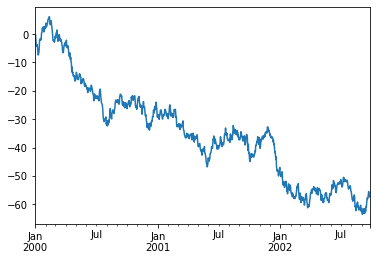

In [130]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

#시계열 그래프

<Figure size 432x288 with 0 Axes>

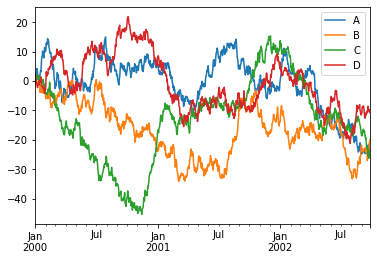

In [135]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

#그래프 한 번에

# Getting Data In/Out (데이터 입/출력)

### CSV

In [136]:
df.to_csv('foo.csv') #csv형식으로

In [137]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.598097,0.981315,-0.033621,-0.333715
1,2000-01-02,-1.174601,0.506625,-0.341083,1.902929
2,2000-01-03,-0.403693,-0.466773,-0.508402,0.153915
3,2000-01-04,2.409120,-1.095435,1.839671,-0.267354
4,2000-01-05,1.935238,-0.362707,1.993212,-0.452986
...,...,...,...,...,...
995,2002-09-22,-22.319584,-24.644400,-23.892103,-9.924317
996,2002-09-23,-24.046820,-22.614133,-26.248396,-9.788669
997,2002-09-24,-22.761562,-20.867899,-25.878388,-9.941377
998,2002-09-25,-23.260954,-21.069311,-24.394613,-10.488987


### HDF5

In [138]:
df.to_hdf('foo.h5', 'df')

In [139]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.598097,0.981315,-0.033621,-0.333715
2000-01-02,-1.174601,0.506625,-0.341083,1.902929
2000-01-03,-0.403693,-0.466773,-0.508402,0.153915
2000-01-04,2.409120,-1.095435,1.839671,-0.267354
2000-01-05,1.935238,-0.362707,1.993212,-0.452986
...,...,...,...,...
2002-09-22,-22.319584,-24.644400,-23.892103,-9.924317
2002-09-23,-24.046820,-22.614133,-26.248396,-9.788669
2002-09-24,-22.761562,-20.867899,-25.878388,-9.941377
2002-09-25,-23.260954,-21.069311,-24.394613,-10.488987


### EXCEL

In [140]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [141]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.598097,0.981315,-0.033621,-0.333715
1,2000-01-02,-1.174601,0.506625,-0.341083,1.902929
2,2000-01-03,-0.403693,-0.466773,-0.508402,0.153915
3,2000-01-04,2.409120,-1.095435,1.839671,-0.267354
4,2000-01-05,1.935238,-0.362707,1.993212,-0.452986
...,...,...,...,...,...
995,2002-09-22,-22.319584,-24.644400,-23.892103,-9.924317
996,2002-09-23,-24.046820,-22.614133,-26.248396,-9.788669
997,2002-09-24,-22.761562,-20.867899,-25.878388,-9.941377
998,2002-09-25,-23.260954,-21.069311,-24.394613,-10.488987


# Gotchas

In [238]:
if pd.Series([False, True, False]).any():
    print("I was true")

I was true
